In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('house.csv')

In [3]:
df

,Neighborhood,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,SalePrice
0,CollgCr,7,2003,856,1710,2,2,208500
1,Veenker,6,1976,1262,1262,2,2,181500
2,CollgCr,7,2001,920,1786,2,2,223500
3,Crawfor,7,1915,756,1717,1,3,140000
4,NoRidge,8,2000,1145,2198,2,3,250000
...,...,...,...,...,...,...,...,...
1455,Gilbert,6,1999,953,1647,2,2,175000
1456,NWAmes,6,1978,1542,2073,2,2,210000
1457,Crawfor,7,1941,1152,2340,2,1,266500
1458,NAmes,5,1950,1078,1078,1,1,142125


In [4]:
df.to_csv('data_clean.csv' , index=False)

In [5]:
df.head()

,Neighborhood,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,SalePrice
0,CollgCr,7,2003,856,1710,2,2,208500
1,Veenker,6,1976,1262,1262,2,2,181500
2,CollgCr,7,2001,920,1786,2,2,223500
3,Crawfor,7,1915,756,1717,1,3,140000
4,NoRidge,8,2000,1145,2198,2,3,250000


In [6]:
# 6.Сколько уникальных районов (Neighborhood)?
r = df['Neighborhood'].nunique()
print(f' уникальных районов {r}')

 уникальных районов 25


In [7]:
# 7.Средняя цена по району — топ 5 дорогих районов.
df.groupby('Neighborhood')['SalePrice'].mean().round().sort_values(ascending=False).head(5)

,SalePrice
Neighborhood,
NoRidge,335295.0
NridgHt,316271.0
StoneBr,310499.0
Timber,242247.0
Veenker,238773.0


In [8]:
# 8.Сколько домов было построено после 2000 года?
r = (df['YearBuilt'] > 2000).sum()
print(f'Домов после 2000 года было построено: {r}')

Домов после 2000 года было построено: 364


In [9]:
# 9.Средняя жилая площадь (GrLivArea) по уровню качества (OverallQual).
df.groupby('OverallQual')['GrLivArea'].mean().round().sort_values(ascending=False)

,GrLivArea
OverallQual,
10,3001.0
9,2078.0
8,1948.0
7,1704.0
6,1466.0
5,1251.0
3,1119.0
4,1107.0
1,619.0


In [10]:
# 10.Есть ли дома с нулевым подвалом? Посчитать долю таких домов.
((df['TotalBsmtSF'] == 0).sum() * 100 / len(df)).round(1)

np.float64(2.5)

In [11]:
len(df)

1460

In [12]:
# 11.Группировка по GarageCars и средняя цена.
df.groupby('GarageCars')['SalePrice'].mean().round().sort_values(ascending=False)

,SalePrice
GarageCars,
3,309636.0
4,192656.0
2,183852.0
1,128117.0
0,103317.0


In [13]:
# 12.Сколько домов имеют 2+ ванных комнаты (FullBath)?
(df['FullBath'] > 2).sum()

np.int64(33)

In [14]:
# 13.Район с наибольшим количеством домов.
df['Neighborhood'].value_counts().head(1)

,count
Neighborhood,
NAmes,225


In [15]:
# 14.Корреляция GrLivArea, TotalBsmtSF, OverallQual, GarageCars с SalePrice.
df.corr(numeric_only=True)

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,SalePrice
OverallQual,1.000000,0.572323,0.537808,0.593007,0.550600,0.600671,0.790982
YearBuilt,0.572323,1.000000,0.391452,0.199010,0.468271,0.537850,0.522897
TotalBsmtSF,0.537808,0.391452,1.000000,0.454868,0.323722,0.434585,0.613581
GrLivArea,0.593007,0.199010,0.454868,1.000000,0.630012,0.467247,0.708624
FullBath,0.550600,0.468271,0.323722,0.630012,1.000000,0.469672,0.560664
GarageCars,0.600671,0.537850,0.434585,0.467247,0.469672,1.000000,0.640409
SalePrice,0.790982,0.522897,0.613581,0.708624,0.560664,0.640409,1.000000


In [16]:
# 15.Построить рейтинг районов по средней цене и сохранить в CSV.
r = df.groupby('Neighborhood')['SalePrice'].mean().round().sort_values(ascending=False)

In [17]:
r.to_csv('rating_neighborhood.csv')

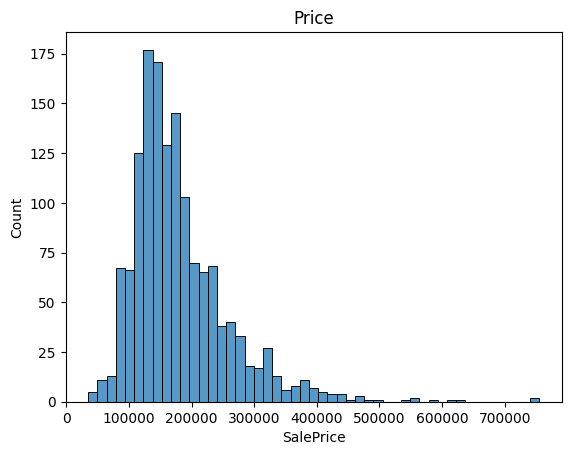

In [18]:
# 20.Построить гистограмму SalePrice + распределение (Seaborn distplot).
sns.histplot(data = df , x = 'SalePrice')
plt.title('Price')
plt.show()

Text(0.5, 1.0, 'OverallQual vs SalePrice')

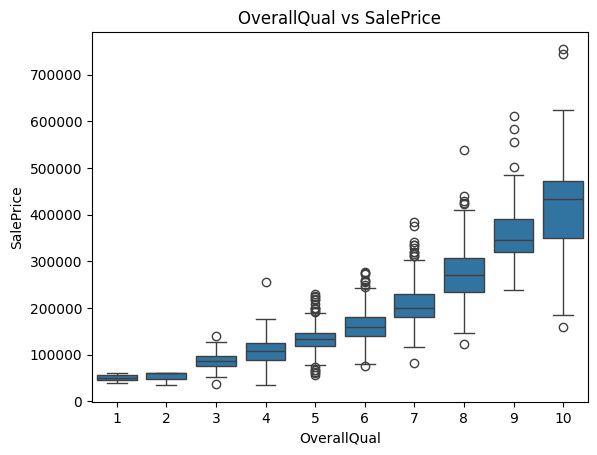

In [19]:
# 21.Построить boxplot: OverallQual vs SalePrice.
sns.boxplot(data = df , x  = 'OverallQual',y='SalePrice')
plt.title('OverallQual vs SalePrice')

<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

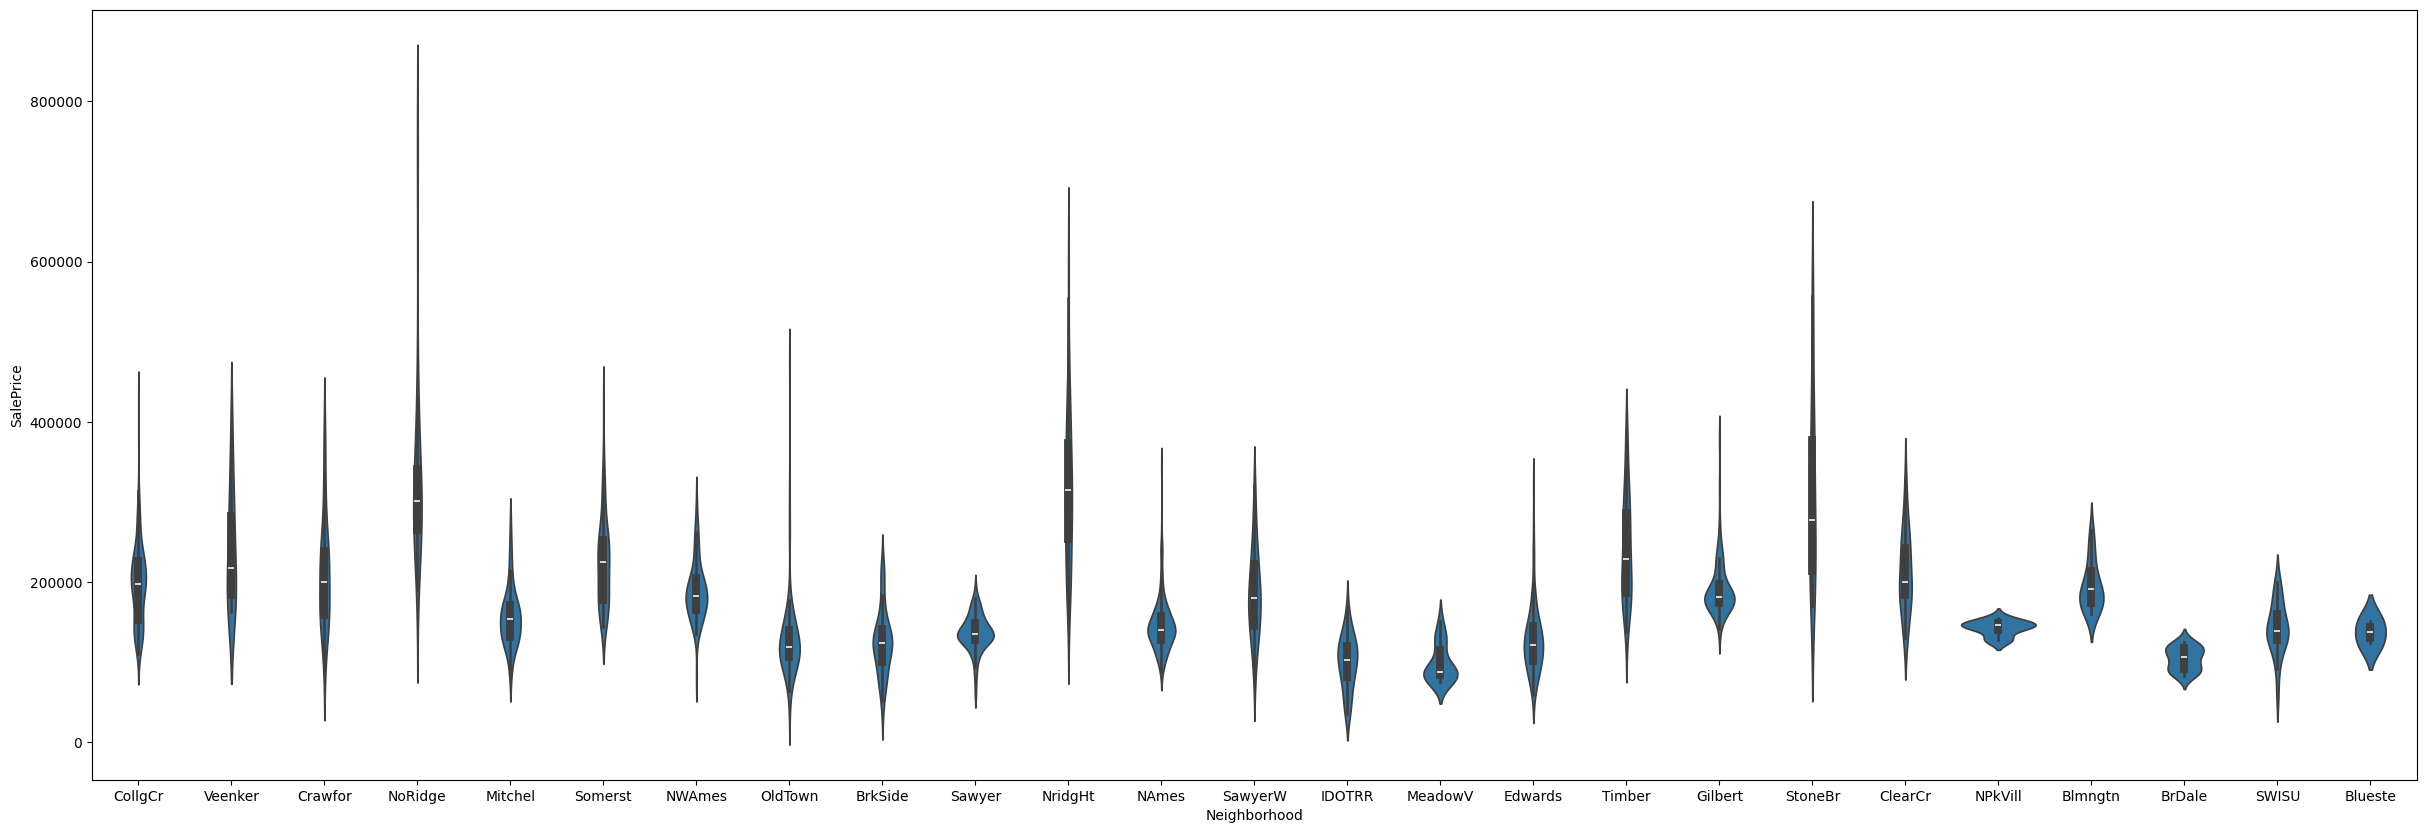

In [20]:
# 22.Построить violinplot: Neighborhood vs SalePrice.

plt.figure(figsize=(30,10))
sns.violinplot(data = df , x = 'Neighborhood' , y = 'SalePrice')

In [21]:
# # 23.Построить heatmap корреляции между 6 числовыми признаками.
# sns.heatmap(df.corr() ,cmap = 'coolwarm')
# plt.show()

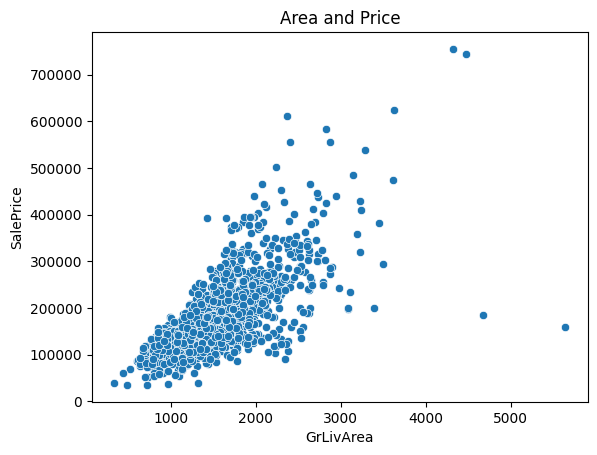

In [22]:
# 24.Построить scatterplot:
# GrLivArea vs SalePrice
# TotalBsmtSF vs SalePrice
# YearBuilt vs SalePrice
sns.scatterplot(data= df , x = 'GrLivArea' , y = 'SalePrice')
plt.title('Area and Price')
plt.show()

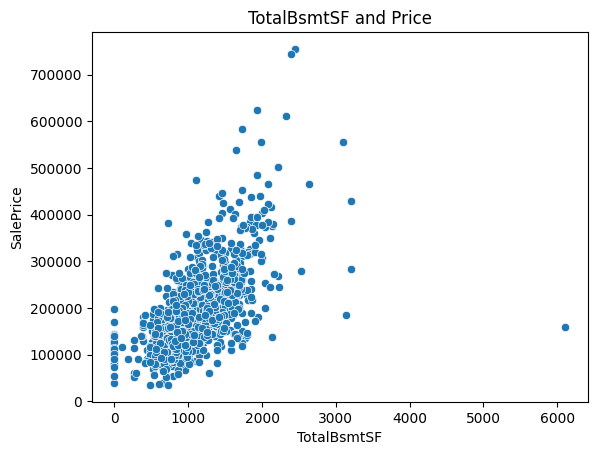

In [23]:
sns.scatterplot(data= df , x = 'TotalBsmtSF' , y = 'SalePrice')
plt.title('TotalBsmtSF and Price')
plt.show()

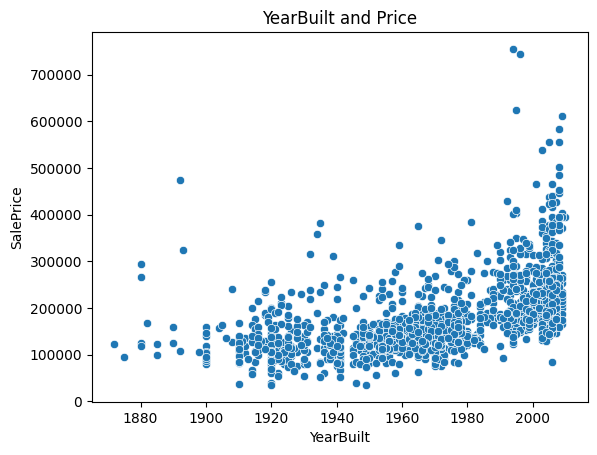

In [24]:
sns.scatterplot(data= df , x = 'YearBuilt' , y = 'SalePrice')
plt.title('YearBuilt and Price')
plt.show()

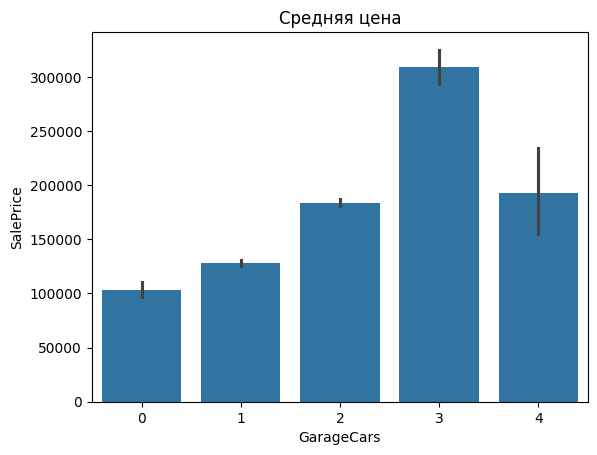

In [25]:
# 25.Построить barplot: средняя цена по GarageCars.
sns.barplot(data=df, x='GarageCars', y='SalePrice', estimator='mean')
plt.title('Средняя цена')
plt.show()

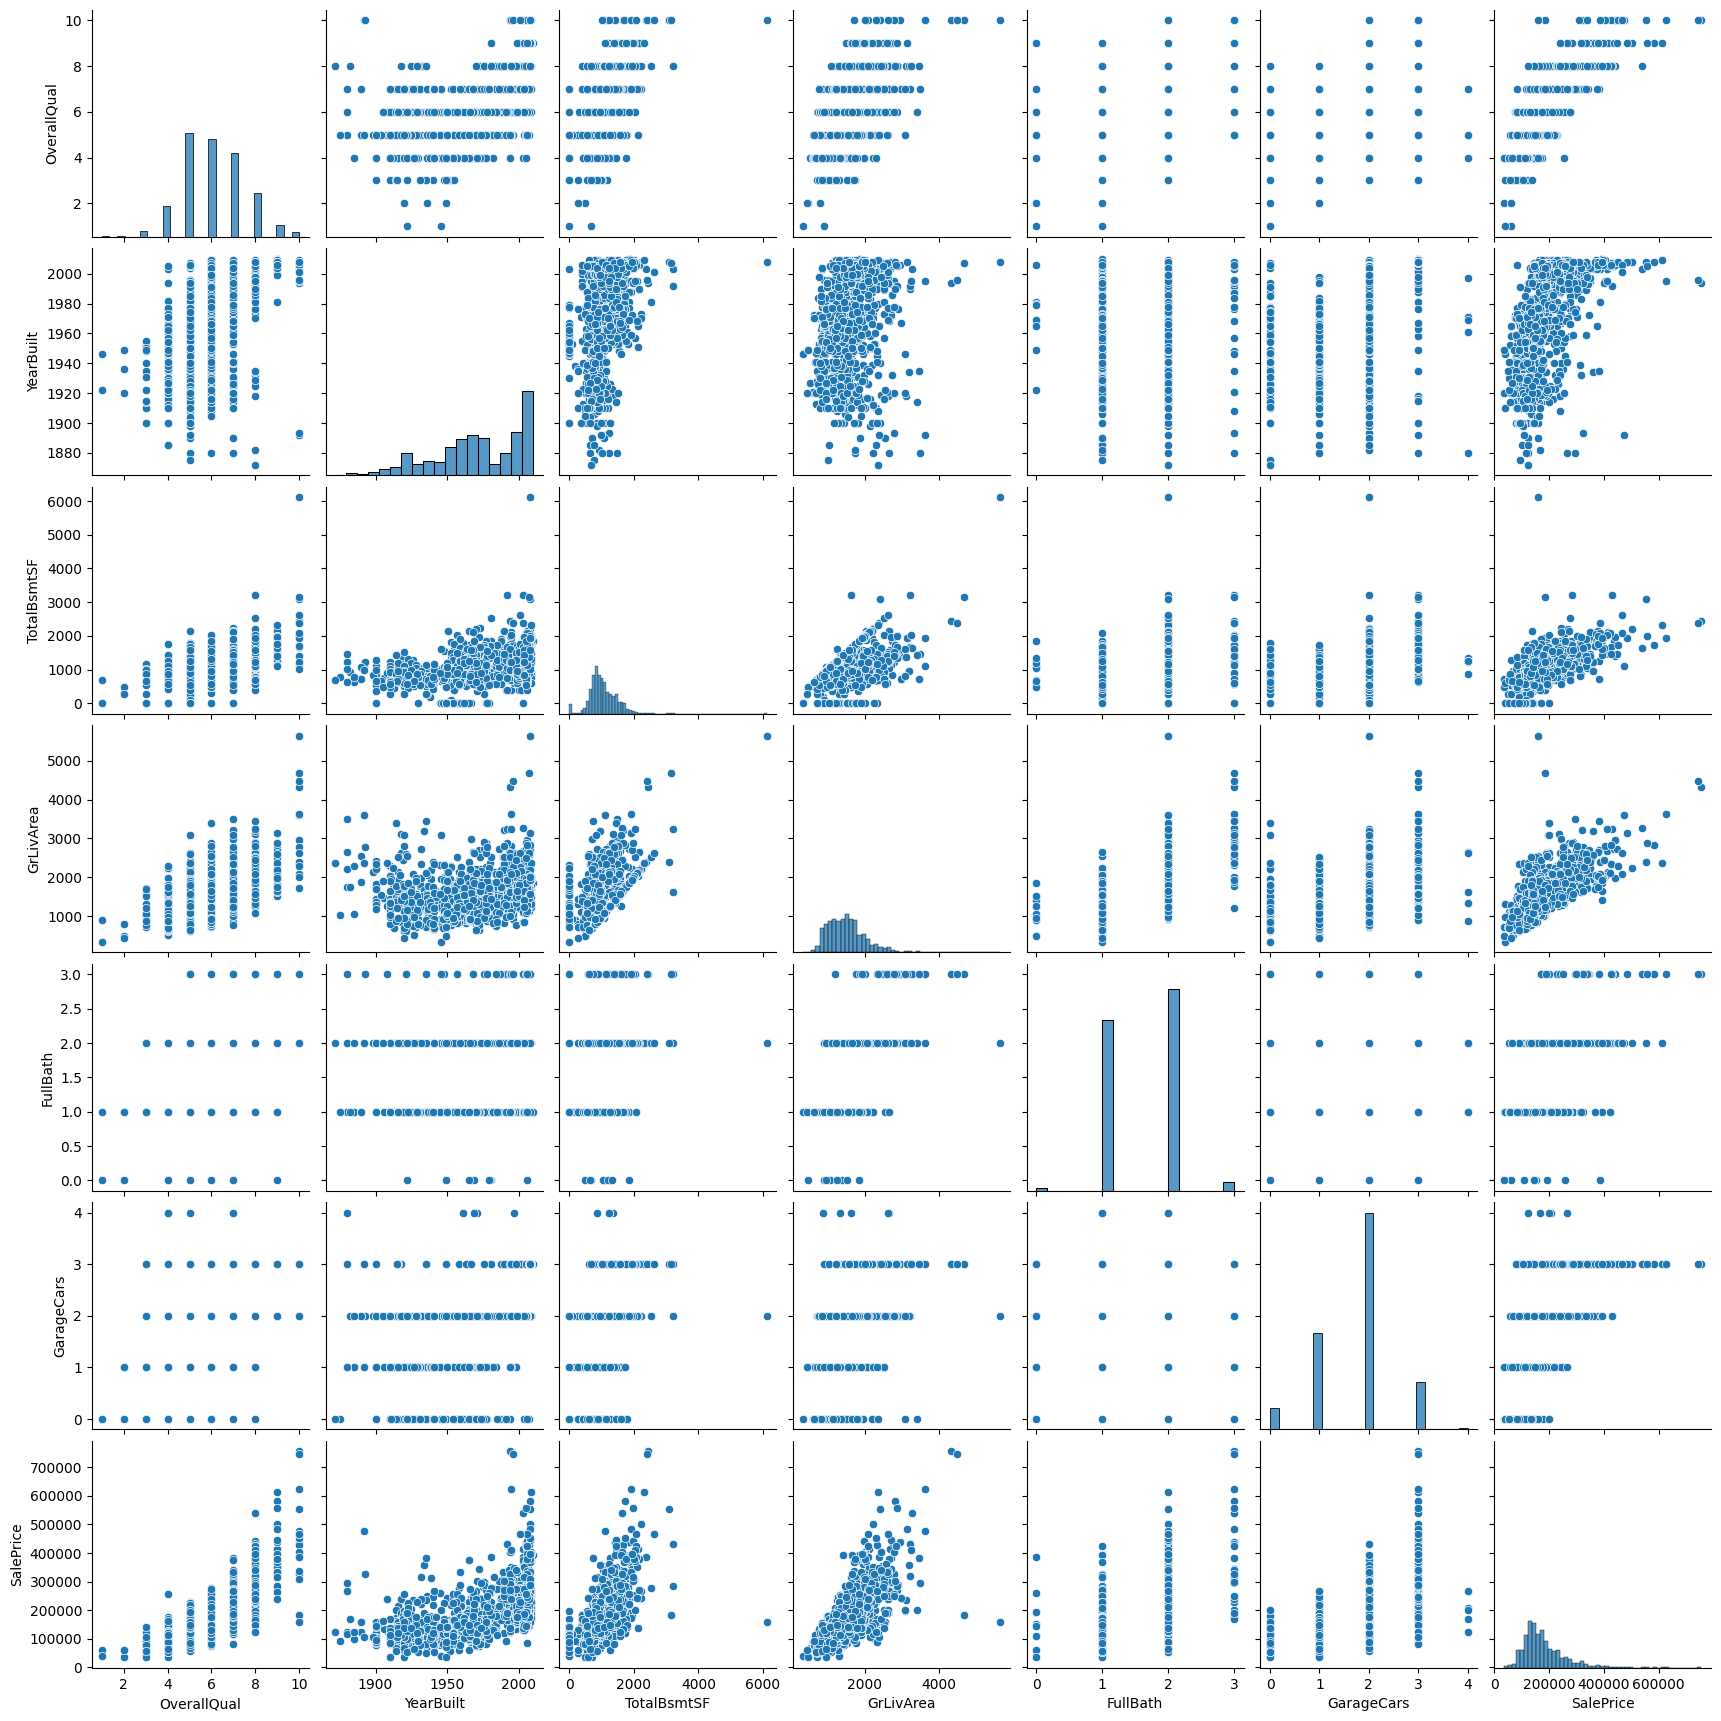

In [26]:
# 27.Построить pairplot по всем числовым признакам.
sns.pairplot(data = df )
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()

In [28]:
df

,Neighborhood,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,SalePrice
0,CollgCr,7,2003,856,1710,2,2,208500
1,Veenker,6,1976,1262,1262,2,2,181500
2,CollgCr,7,2001,920,1786,2,2,223500
3,Crawfor,7,1915,756,1717,1,3,140000
4,NoRidge,8,2000,1145,2198,2,3,250000
...,...,...,...,...,...,...,...,...
1455,Gilbert,6,1999,953,1647,2,2,175000
1456,NWAmes,6,1978,1542,2073,2,2,210000
1457,Crawfor,7,1941,1152,2340,2,1,266500
1458,NAmes,5,1950,1078,1078,1,1,142125


In [29]:
df = pd.get_dummies(df, columns = ['Neighborhood'] ,drop_first = True).astype(int)

In [30]:
df.isnull().sum()

,0
OverallQual,0
YearBuilt,0
TotalBsmtSF,0
GrLivArea,0
FullBath,0
GarageCars,0
SalePrice,0
Neighborhood_Blueste,0
Neighborhood_BrDale,0
Neighborhood_BrkSide,0


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = df.drop(columns=['SalePrice'])
scaled_data = scaler.fit_transform(features)

In [32]:
x = scaled_data
y = df['SalePrice']

In [33]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train, y_test=train_test_split(x , y , test_size=0.2 , random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()

In [35]:
lin_model.fit(x_train, y_train)

LinearRegression()

In [36]:
y_pred = lin_model.predict(x_test)

In [37]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8267380266474198

In [38]:
import joblib

joblib.dump(lin_model , 'model.pkl')
joblib.dump(scaler , 'scaler.pkl')

['scaler.pkl']

In [39]:
li = []
for i in  df:
  subword = 'Neighborhood_'
  if subword in i:
    li.append(i[len(subword):])
print(li)


['Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker']
